## Search Engine

Students: Irene Cantero (U151206) / Jian Chen (U150279)

All the code is stored in the folder `search_engine`. The notebook only contains the calls and some functions to do the T-SNE and the clustering.

Content: 

- Top 10 results only using TF-IDF + Cosine similarity for 10 chosen queries
- Top 10 results using Word2Vec + Cosine similarity for the same 10 chosen queries
- Search with custom score G(d) * Doc2Vec (cosine similarity) for a given query
        - G(d) considers the (1/2)Tweets likes, (1/3)retweets and (1/6) replies
- T-SNE implementation and plot using T-SNE.
- Plot to see the optimal number of clusterings.
- Clustering using K means and the optimal number of clusterings, showing the most common words of each cluster as well.

In [1]:
from search_engine.search_engine import SearchEngine
import pandas as pd
import os
import warnings
import csv

warnings.filterwarnings('ignore')

In [2]:
# The collection time is not shown here, because we ran the code with GET_TWEETS = 0, so the search engine is not using
# collecting tweets. However, when getting the 100k, the collection time was 2001ms.
search_engine = SearchEngine()

Collection time: 0.0


Here we run the search engine considering the popularity (Likes, Retweets and Replies) of each tweet.

In [4]:
pd.set_option('display.max_colwidth', -1)
search_engine.ranking_system.change_user_input(2)
print("Insert your query:\n")
query = input()
search_engine.run(query).query("score > 0").head(20)

Insert your query:

joe biden


,Tweet,Username,Date,Hashtags,Likes,Retweets,Replies,Url,score
0,We all know who won. And it wasn't Joe Biden....,GrrrGraphics Cartoons,Mon Dec 07 14:52:11 +0000 2020,[],963,368,25,https://twitter.com/i/web/status/1335960302144290816,0.997549
1,How many times can Joe Biden win Georgia?,Kyle Griffin,Mon Dec 07 20:20:25 +0000 2020,[],10405,629,602,https://twitter.com/i/web/status/1336042905333448704,0.997223
2,Georgia just re-certified Joe Biden’s victory.,Palmer Report,Mon Dec 07 19:27:41 +0000 2020,[],4511,518,110,https://twitter.com/i/web/status/1336029632701861889,0.996323
3,"Man, Joe Biden REALLY won Georgia.",Adam Parkhomenko,Mon Dec 07 14:57:14 +0000 2020,[],14980,857,275,https://twitter.com/i/web/status/1335961571508555781,0.995777
4,Joe Biden will be a bad president.,Dwight Rhinosoros,Mon Dec 07 20:06:42 +0000 2020,[],1654,55,40,https://twitter.com/i/web/status/1336039453052252162,0.993186
5,Georgia recertified Joe Biden’s win in the state on Monday after a second hand recount of votes.,Twitter Moments,Mon Dec 07 23:14:18 +0000 2020,[],19,3,2,https://twitter.com/i/web/status/1336086664117161984,0.992394
6,"Georgia recertified Joe Biden’s win in the state Monday after a second hand recount of votes. “We have now counted legally cast ballots three times, and the results remain unchanged,” the secretary of state said. https://t.co/7VnFXpaYSl",The Wall Street Journal,Mon Dec 07 21:01:58 +0000 2020,[],211,36,28,https://twitter.com/i/web/status/1336053360651366407,0.991598
7,"@marceelias ""Georgia has re-certified Joe Biden the winner by 11,784 votes.""",NotATweeter16,Mon Dec 07 19:10:47 +0000 2020,[],157,14,2,https://twitter.com/i/web/status/1336025378503143428,0.991586
8,Is Joe Biden set to win Georgia again tonight or are we good until tomorrow?,🎼🎤🎵Purple Hayes🎵🎤🎼,Mon Dec 07 22:35:32 +0000 2020,[],125,19,11,https://twitter.com/i/web/status/1336076909336260614,0.991096
9,Joe Biden lost the election.,Nick Adams,Sun Dec 06 13:49:30 +0000 2020,[],9695,2480,253,https://twitter.com/i/web/status/1335582137433681921,0.991027


In [ ]:
pd.set_option('display.max_colwidth', -1)
search_engine.ranking_system.change_user_input(2)
print("Insert your query:\n")
query = input()
search_engine.run_custom_score(query).query("custom_score > 0").head(20)

This is the code to answer RQ1b:

In [3]:
pd.set_option('display.max_colwidth', -1)
#chosen queries
queries=[]
queries.append("joe biden won elections")
queries.append("donald trump is the president")
queries.append("elections are a fraud")
queries.append("pennsylvania")
queries.append("trump out")
queries.append("votes fraud")
queries.append("i voted")
queries.append("georgia votes")
queries.append("trump team")
queries.append("biden team")

#NOTE: to open the tsv correctly use UTF-8
try:
    os.remove('other-outputs/RQ1b.tsv')
except:
    pass

search_engine.ranking_system.change_user_input(1) #Using TF-IDF + cosine_similarity
# Setting the header of the TSV file
RQ1 = open('other-outputs/RQ1b.tsv', 'a+')
RQ1.write("\tTweet\tUsername\tDate\tHashtags\tLikes\tRetweets\tReplies\tUrl\tScore\n")
RQ1.close()

# Storing each result of each query in the TSV file
for query in queries:
    RQ1 = open('other-outputs/RQ1b.tsv', 'a+')
    RQ1.write(f"QUERY\t{query}\n")
    RQ1.close()
    print(f"\nQUERY: {query.upper()}\n")
    results=search_engine.run(query).query("score > 0").head(20)
    display(results)
    results.replace('\n',' ', regex=True).to_csv(path_or_buf='other-outputs/RQ1b.tsv', sep='\t', header=False, mode = 'a')
    


QUERY: JOE BIDEN WON ELECTIONS



,Tweet,Username,Date,Hashtags,Likes,Retweets,Replies,Url,score
0,Joe Biden lost the election.,Nick Adams,Sun Dec 06 13:49:30 +0000 2020,[],9695,2480,253,https://twitter.com/i/web/status/1335582137433681921,0.707926
1,Joe Biden was “Selected” not elected.,The TRUMP PAGE 🇺🇸,Mon Dec 07 17:45:45 +0000 2020,[],411,105,20,https://twitter.com/i/web/status/1336003980594270208,0.525582
2,Good morning. Joe biden is not president elect. That is all.,President elect-Redwave,Mon Dec 07 13:05:32 +0000 2020,[],0,1,0,https://twitter.com/i/web/status/1335933461782269953,0.490071
3,President-elect Joe Biden becomes President Joe Biden in 44 days.,Robert Reich,Mon Dec 07 17:00:02 +0000 2020,[],5168,362,158,https://twitter.com/i/web/status/1335992476633481216,0.466209
4,Georgia again certifies election results showing Joe Biden won,ABC7 Eyewitness News,Mon Dec 07 19:55:51 +0000 2020,[],176,16,13,https://twitter.com/i/web/status/1336036723529195520,0.442629
5,US election results 2020: Joe Biden defeats Donald Trump to win presidency,Guardian news,Mon Dec 07 17:21:32 +0000 2020,[],89,16,29,https://twitter.com/i/web/status/1335997887386443779,0.369994
6,"IT'S OFFICIAL: Georgia has CERTIFIED its election results again, and Joe Biden is still our next President.\n\nAnd in January, we'll beat #DoubleDealingDavid and #CorruptKelly to flip the senate and win GA again!!!",BrooklynDad_Defiant!,Mon Dec 07 19:32:38 +0000 2020,"[DoubleDealingDavid, CorruptKelly]",5356,721,98,https://twitter.com/i/web/status/1336030877088964610,0.368337
7,How can Joe Biden govern a nation when 6/10 Americans think there was election fraud?,Nick Adams,Sun Dec 06 00:02:36 +0000 2020,[],993,202,84,https://twitter.com/i/web/status/1335374041981575169,0.365196
8,"Georgia has officially certified its election results yet again.\n\nJoe Biden will be our President after winning for the 50th time in a single month, yay.",Ricky Davila,Mon Dec 07 21:11:57 +0000 2020,[],2102,233,39,https://twitter.com/i/web/status/1336055871411896320,0.364454
9,Great news for President-elect Joe Biden via @PalmerReport,Joshua Moreland,Mon Dec 07 21:54:13 +0000 2020,[],38,14,0,https://twitter.com/i/web/status/1336066510079602690,0.356818



QUERY: DONALD TRUMP IS THE PRESIDENT



,Tweet,Username,Date,Hashtags,Likes,Retweets,Replies,Url,score
0,@realDonaldTrump Donald Trump has failed this nation as a president and as a human being.,Nathan Max,Mon Dec 07 22:15:10 +0000 2020,[],73,9,0,https://twitter.com/i/web/status/1336071782952914944,0.455912
1,“We will never surrender. “ -President Donald J. Trump,ArmyBratt ⭐️⭐️⭐️Parler: ArmyBratt68,Sun Dec 06 13:56:00 +0000 2020,[],1011,289,16,https://twitter.com/i/web/status/1335583774852206593,0.433325
2,US election results 2020: Joe Biden defeats Donald Trump to win presidency,Guardian news,Mon Dec 07 17:21:32 +0000 2020,[],89,16,29,https://twitter.com/i/web/status/1335997887386443779,0.400522
3,'it just takes ONE brave state' -President Donald J Trump.,Trumpster,Mon Dec 07 22:58:07 +0000 2020,[],59,15,1,https://twitter.com/i/web/status/1336082590311313408,0.400337
4,"'WE WON GEORGIA - You know we won,' says President Donald Trump during a rally in Valdosta, GA. https://t.co/VlT7z8drtO https://t.co/Szc0hFJkYk",Newsmax,Sun Dec 06 00:35:09 +0000 2020,[],12182,2195,295,https://twitter.com/i/web/status/1335382234862325761,0.390140
5,"No president has attempted to pardon himself while in office, so if President Donald Trump tries to do so in the next six weeks, he will be venturing into legally untested territory without clear guidance from the Constitution or from judges.​ https://t.co/tWLdPxJdF0",ABC30 Fresno,Mon Dec 07 23:20:18 +0000 2020,[],2,1,0,https://twitter.com/i/web/status/1336088172590223360,0.389607
6,"No president has attempted to pardon himself while in office, so if President Donald Trump tries to do so in the next six weeks, he will be venturing into legally untested territory without clear guidance from the Constitution or from judges.​ https://t.co/q97Ztt0MOq",ABC 7 Chicago,Mon Dec 07 23:10:27 +0000 2020,[],1,1,0,https://twitter.com/i/web/status/1336085693353889798,0.389607
7,Donald Trump is my president.\n\nAnd I’m feeling mighty protective of my president and my country right about now.\n\n#StopTheSteal #SaveTheRepublic @JennaEllisEsq @RudyGiuliani #SaveAmerica #MAGA #KAG2020 🇺🇸 https://t.co/UBB2BS1UyY,#1776 Donald Trump 🇺🇸,Mon Dec 07 02:29:22 +0000 2020,"[StopTheSteal, SaveTheRepublic, SaveAmerica, MAGA, KAG2020]",104,38,1,https://twitter.com/i/web/status/1335773363709472768,0.386314
8,"I'm Corupt, Donald Trump. Ex PRESIDENT OF AMERICA 🇺🇸.",Senad.kelly@gmail.com,Mon Dec 07 23:25:47 +0000 2020,[],1,1,0,https://twitter.com/i/web/status/1336089551337639937,0.372278
9,"“No one will trust our our election system ever again if we don’t fix it this time.”\n\nPresident Donald Trump should keep fighting to ensure the #2020Election was fair and free, says Rep-elect @LaurenBoebert. https://t.co/JPq1snrAtf",The Epoch Times,Mon Dec 07 21:10:01 +0000 2020,[2020Election],634,140,26,https://twitter.com/i/web/status/1336055386932195330,0.361682



QUERY: ELECTIONS ARE A FRAUD



,Tweet,Username,Date,Hashtags,Likes,Retweets,Replies,Url,score
0,"@jaketapper ""I won the election"" ""Actually, I won"" ""Fraud!"" ""There was fraud! Big fraud!"" ""I won""",Carl Allen,Mon Dec 07 23:21:05 +0000 2020,[],2,2,0,https://twitter.com/i/web/status/1336088371853221893,0.468184
1,ELECTION IN GEORGIA IS NOW PROVEN TO BE A FRAUD.,Rudy W. Giuliani,Thu Dec 03 22:09:12 +0000 2020,[],192874,54120,10294,https://twitter.com/i/web/status/1334620731045507073,0.437593
2,The only fraud in the 2020 election is Donald J. Trump.,(((DeanObeidallah))),Mon Dec 07 16:27:25 +0000 2020,[],367,60,7,https://twitter.com/i/web/status/1335984266346369025,0.416229
3,This 2020 election was the biggest joke ever! Fraud! Fraud! Fraud!,🇺🇸 ✝️ RICK (VOTER FRAUD IS REAL!) ✝️ 🇺🇸,Mon Dec 07 23:13:14 +0000 2020,[],10,2,0,https://twitter.com/i/web/status/1336086393588748289,0.412585
4,Their no election fraud claims have all been debunked.,hANdsOme seaN,Mon Dec 07 22:09:35 +0000 2020,[],60,10,2,https://twitter.com/i/web/status/1336070377663987714,0.410677
5,VOTER FRAUD @realDonaldTrump won the 2020 election Treason,Jess 🇺🇸,Mon Dec 07 21:29:51 +0000 2020,[],319,41,16,https://twitter.com/i/web/status/1336060379131244546,0.388766
6,Election Fraud protest live in AZ now.....,Sunnyloves45 (Biden Cheated),Mon Dec 07 23:28:04 +0000 2020,[],2,1,0,https://twitter.com/i/web/status/1336090129413206018,0.364729
7,I believe Obama helped organize this election fraud,Rogan O’Handley 🇺🇸,Sun Dec 06 20:59:48 +0000 2020,[],40520,6605,2088,https://twitter.com/i/web/status/1335690426645405698,0.348477
8,"Next time, all these criminals will get into our country if Biden's fraud election wins.",Catherine 🇺🇸 ⭐️⭐️⭐️,Mon Dec 07 23:27:24 +0000 2020,[],1,1,0,https://twitter.com/i/web/status/1336089959078522881,0.339920
9,The Trump Administration has lost 46 “fraud election” cases.,🔥☄️ Micah the Heat Miser 🤬🧯,Mon Dec 07 23:27:35 +0000 2020,[],1,1,1,https://twitter.com/i/web/status/1336090005752733696,0.337537



QUERY: PENNSYLVANIA



,Tweet,Username,Date,Hashtags,Likes,Retweets,Replies,Url,score
0,"President @realDonaldTrump won Pennsylvania—and the people know it!!\n\nPennsylvania, it’s your time to #FightForTrump! https://t.co/zawvPjvjkJ",Natalie Harp,Mon Dec 07 23:28:02 +0000 2020,[FightForTrump],6,1,0,https://twitter.com/i/web/status/1336090117690150912,0.605953
1,Niggas in Pennsylvania be like,dykes cant fight,Mon Dec 07 15:55:25 +0000 2020,[],233,46,7,https://twitter.com/i/web/status/1335976215107280897,0.454179
2,The only problem Pennsylvania has is .@GovernorTomWolf,Governor Wolf is a Criminal McLiberTea,Mon Dec 07 22:52:23 +0000 2020,[],0,1,0,https://twitter.com/i/web/status/1336081146342412290,0.381951
3,"What we see here is fraud perpetrated against the people of Pennsylvania, against the American people and the Electoral College process by politicians.\nLevin Calls for SCOTUS to Intercede in Election Fraud -- Pennsylvania 'Abandoned Its Constitution' https://t.co/hDb9tqqP3R",🍀underdog13🍀❌,Mon Dec 07 05:19:01 +0000 2020,[],295,230,3,https://twitter.com/i/web/status/1335816061250363397,0.376474
4,"I'm a Legislator in Pennsylvania, and I'm Suing the Governor for Election Fraud",Jim Hoft,Sat Dec 05 17:13:53 +0000 2020,[],50968,13331,1222,https://twitter.com/i/web/status/1335271187077795843,0.372658
5,@marklevinshow ~ Pennsylvania’s electors are tainted . . . because Pennsylvania’s State Legislation didn’t follow its own Constitution. #StopTheSteal https://t.co/GSBxGz3wZZ,DeplorableArmyBrat,Mon Dec 07 10:14:07 +0000 2020,[StopTheSteal],913,596,11,https://twitter.com/i/web/status/1335890325282447360,0.372304
6,SPOILER ALERT: Trump won #Pennsylvania !,𝙅𝙖𝙢𝙚𝙨 ¹⁷ 🇺🇸,Mon Dec 07 19:18:11 +0000 2020,[Pennsylvania],9,2,1,https://twitter.com/i/web/status/1336027242267283456,0.367555
7,@SenMastriano PENNSYLVANIA absolutely must do the right thing!!!,President Elect Lori Jackson 🇺🇸,Mon Dec 07 22:03:36 +0000 2020,[],0,1,0,https://twitter.com/i/web/status/1336068872743620611,0.357348
8,Ted Cruz: I’ll Argue Pennsylvania Election Fraud Case Before the Supreme Court,Scott ⌛️⚖️🇺🇸,Mon Dec 07 23:35:06 +0000 2020,[],2,1,0,https://twitter.com/i/web/status/1336091898759536641,0.340379
9,"The fight for Pennsylvania is more than just a fight for a swing state. If in the state where the United States constitution was written and the famous Declaration of Independence was given, both are being trampled upon as irrelevant, then it’s the end of the republic.",Amir Tsarfati,Mon Dec 07 05:20:20 +0000 2020,[],3488,862,42,https://twitter.com/i/web/status/1335816388968148994,0.339270



QUERY: TRUMP OUT



,Tweet,Username,Date,Hashtags,Likes,Retweets,Replies,Url,score
0,TRUMP WON,nancy gao,Sat Dec 05 21:34:39 +0000 2020,[],75,31,25,https://twitter.com/i/web/status/1335336811758034950,1.000000
1,Trump won,Resistance#KBF#Q#Herd-immunityUK.DJT,Mon Dec 07 18:26:03 +0000 2020,[],2,1,0,https://twitter.com/i/web/status/1336014121398132736,1.000000
2,This is just so... Trump,kiramadeira 🤔,Mon Dec 07 22:46:41 +0000 2020,[],0,1,0,https://twitter.com/i/web/status/1336079715279507462,1.000000
3,Trumps America,💛You Can Call Me ‘Queen,Thu Aug 27 16:31:37 +0000 2020,[],18,14,2,https://twitter.com/i/web/status/1299021761816809474,0.433283
4,trump's america y'all.,Kathy😷(#WashYourFuckingHands)😷,Sun Aug 30 06:42:55 +0000 2020,[],7,10,0,https://twitter.com/i/web/status/1299960776489230336,0.433283
5,♥️♥️♥️👍♥️🇺🇸🦅♥️OUR PRESIDENT TRUMP🇺🇸👍,Danielle Marie Reed,Mon Dec 07 18:29:34 +0000 2020,[],0,1,0,https://twitter.com/i/web/status/1336015005989277696,0.432750
6,Donald Trump.,Senad.kelly@gmail.com,Mon Dec 07 23:26:11 +0000 2020,[],1,1,0,https://twitter.com/i/web/status/1336089652302929922,0.319722
7,TRUMP FOR THE WIN 😄,Kristan 👩‍🦰,Mon Dec 07 23:18:34 +0000 2020,[],1,1,0,https://twitter.com/i/web/status/1336087737892532225,0.302007
8,“FIGHT FOR TRUMP”,Ambur Walker,Sun Dec 06 01:38:01 +0000 2020,[],5089,1272,77,https://twitter.com/i/web/status/1335398057144356864,0.279028
9,Fight for Trump,Deebabs,Mon Dec 07 23:38:51 +0000 2020,[],0,1,0,https://twitter.com/i/web/status/1336092842578612226,0.279028



QUERY: VOTES FRAUD



,Tweet,Username,Date,Hashtags,Likes,Retweets,Replies,Url,score
0,Fraud fraud. Audit the middle of the night votes. Stop suit case voting. The Georgia Vote-Counting Video Was Not 'Debunked.' Not Even Close https://t.co/hn7zX7Y16r,Janie Johnson - 80 million votes 4 Lemonade Stands,Mon Dec 07 15:01:19 +0000 2020,[],62,35,9,https://twitter.com/i/web/status/1335962600048189442,0.322465
1,"@MingGao26 They keep saying there's voting fraud because they know there is, they committed it.",Justice 🖤 RBG,Mon Dec 07 16:42:07 +0000 2020,[],19,4,1,https://twitter.com/i/web/status/1335987965902741504,0.299099
2,The Supreme Court needs to see the election fraud and send it to the House for a final presidential vote.,Corky Swift,Mon Dec 07 10:36:28 +0000 2020,[],24,4,3,https://twitter.com/i/web/status/1335895948464168961,0.283463
3,@LisaMarieBoothe If Trump wins and voting fraud has ended than yes we’re free.,🎄🎁🎄MSTRISH KAG,Mon Dec 07 05:56:41 +0000 2020,[],358,150,6,https://twitter.com/i/web/status/1335825540121460737,0.281647
4,"""For the millions of people who voted for the president, the most persuasive evidence of massive fraud in the election is likely to be the parade of such categorical assurances that there is no evidence of it.""\nhttps://t.co/MJ35pB6Y2C",Kyle Becker,Mon Dec 07 20:25:40 +0000 2020,[],787,215,15,https://twitter.com/i/web/status/1336044224572219394,0.267808
5,Why was the audio for the Georgia Hearing on Vote Fraud set to PRIVATE while it was in progress?,Cari Kelemen,Mon Dec 07 18:12:25 +0000 2020,[],1490,431,30,https://twitter.com/i/web/status/1336010690088349702,0.251617
6,"@streetglide12 MSM is winning! They want you to give up, but there is clear evidence of voting Fraud. A few more weeks!","Who will Save CT, #BidenCheated 😡",Mon Dec 07 21:22:22 +0000 2020,[],3,1,1,https://twitter.com/i/web/status/1336058496413016064,0.242604
7,The Michigan House committee looking into alleged vote fraud in the 2020 election is threatening Dominion Voting Systems with a subpoena to appear and testify. https://t.co/rSr7v2CXF6,Breitbart News,Mon Dec 07 22:52:17 +0000 2020,[],1218,313,77,https://twitter.com/i/web/status/1336081121818316800,0.241599
8,"When your candidate has been defeated by over 7 million votes &amp; he’s making money by claiming fraud &amp; refusing to concede, you’re not a freedom fighter because you’re excited for him to keep battling. You’re one of the exploited who’s been duped by a conman who rejects democracy.",Steven Beschloss,Sat Dec 05 19:17:36 +0000 2020,[],23550,5189,337,https://twitter.com/i/web/status/1335302320175816705,0.239539
9,"3 Part Video from OAN\nof not so fun facts about the 2020 election &amp; why it is not over\nVOTE FRAUD 2020\nThis is only the tried &amp; true classic forms of Vote fraud\nThis doesn’t even account for\nhi-tech Vote fraud l, algorithms, flash drives ect\nTip of the iceberg\n#TrumpWon2020 https://t.co/IFDfdbIfqu",Italia19🇺🇸🇮🇹🇺🇸,Mon Dec 07 02:13:30 +0000 2020,[TrumpWon2020],169,165,8,https://twitter.com/i/web/status/1335769370711240705,0.236299



QUERY: I VOTED



,Tweet,Username,Date,Hashtags,Likes,Retweets,Replies,Url,score
0,VOTE THEM all OUT!,ONN,Mon Dec 07 21:52:37 +0000 2020,[],4,3,0,https://twitter.com/i/web/status/1336066108428783617,1.000000
1,“Why did you vote for Joe Biden?”,COL Joe #StopTheSteal,Mon Dec 07 23:19:04 +0000 2020,[],11,2,2,https://twitter.com/i/web/status/1336087861473538049,0.542071
2,Votee! Thank you!,Femii.,Mon Dec 07 23:17:28 +0000 2020,[],0,1,0,https://twitter.com/i/web/status/1336087461697646594,0.478901
3,More votes please,Fernando Gros,Mon Dec 07 20:49:59 +0000 2020,[],1,1,0,https://twitter.com/i/web/status/1336050343780683779,0.476935
4,Trump in Georgia: 'Get out and vote.',Byron York,Mon Dec 07 13:32:52 +0000 2020,[],169,38,6,https://twitter.com/i/web/status/1335940342563155970,0.456523
5,This is what you voted for when you voted for when you vote democrat!!🤬🤬🤬Why even elect representatives when they aren’t working for our interests? #VoteThemAllOut #PatriotParty https://t.co/5f59GbclmL,Mobycat6969,Sun Dec 06 14:04:35 +0000 2020,"[VoteThemAllOut, PatriotParty]",358,356,34,https://twitter.com/i/web/status/1335585936218988545,0.397584
6,GO VOTE WE'RE LOSING,ᴮᴱ vic⁷ - BTS GRAMMY NOMINEEES,Mon Dec 07 23:10:01 +0000 2020,[],0,1,0,https://twitter.com/i/web/status/1336085583907729408,0.375152
7,"If I could vote in America, I’d vote with kindness.",Harry Styles.,Tue Oct 27 19:38:51 +0000 2020,[],1288428,241396,74441,https://twitter.com/i/web/status/1321174540223795201,0.368481
8,Georgia must get out and vote!,Demetrye Isoldi,Mon Dec 07 16:53:04 +0000 2020,[],2,1,0,https://twitter.com/i/web/status/1335990721120231440,0.354536
9,💥Count only LEGAL VOTES💥,Renata4Trump🇺🇸🇮🇹⭐⭐⭐,Mon Dec 07 15:21:02 +0000 2020,[],43,40,1,https://twitter.com/i/web/status/1335967561406672896,0.349035



QUERY: GEORGIA VOTES



,Tweet,Username,Date,Hashtags,Likes,Retweets,Replies,Url,score
0,Trump in Georgia: 'Get out and vote.',Byron York,Mon Dec 07 13:32:52 +0000 2020,[],169,38,6,https://twitter.com/i/web/status/1335940342563155970,0.742664
1,Georgia must get out and vote!,Demetrye Isoldi,Mon Dec 07 16:53:04 +0000 2020,[],2,1,0,https://twitter.com/i/web/status/1335990721120231440,0.576753
2,RT if you think they should audit the signatures on votes in Georgia.,Ian Miles Cheong,Sun Dec 06 14:02:19 +0000 2020,[],35194,14588,404,https://twitter.com/i/web/status/1335585362878496772,0.407781
3,"No matter how many times Georgia counted the votes, Joe Biden won",The National Memo,Mon Dec 07 23:08:12 +0000 2020,[],7,1,0,https://twitter.com/i/web/status/1336085128020451331,0.372348
4,PLEASE VOTE LIKE CRAZY IN GEORGIA. WE NEED THE SENATE,🆘🆘✊🏾NaN✊🏾🆘🆘,Mon Dec 07 23:01:57 +0000 2020,[],7,2,0,https://twitter.com/i/web/status/1336083556922236930,0.363718
5,Link: Trump in Georgia: 'Get out and vote.' 3/3 End.,Byron York,Mon Dec 07 13:41:54 +0000 2020,[],159,31,7,https://twitter.com/i/web/status/1335942615754280965,0.358081
6,"""...to force a Biden administration to go through McConnell...."" FORCE the Biden administration? Georgia, vote for @ossoff &amp; @ReverendWarnock &amp; ditch Mitch!\n#ONEV1 \nMcConnell moves one step closer to ramming through Trump's anti-First Amendment FCC pick https://t.co/Mg2GComyhM",Babz #BIDEN/HARRIS #PRU #OneV1 #DemCast #BLM,Mon Dec 07 19:56:50 +0000 2020,[ONEV1],9,7,2,https://twitter.com/i/web/status/1336036969688625153,0.340450
7,Right now Georgia is determined by about 23k votes.,Steve Deace,Mon Dec 07 13:07:03 +0000 2020,[],357,112,20,https://twitter.com/i/web/status/1335933845024206849,0.312587
8,"Georgia lawsuit alleges 87,000 illegal votes",The Election Wizard,Sun Dec 06 17:24:28 +0000 2020,[],1335,378,17,https://twitter.com/i/web/status/1335636238464933893,0.301288
9,"It's 11 a.m., and Trump has already lost lawsuits in Michigan and Georgia, and lost the Georgia vote for a third time. My liver can't take much more of this.\n\nwomp womp.",Amy Siskind 🏳️‍🌈,Mon Dec 07 16:07:19 +0000 2020,[],10055,956,161,https://twitter.com/i/web/status/1335979208565252096,0.295957



QUERY: TRUMP TEAM



,Tweet,Username,Date,Hashtags,Likes,Retweets,Replies,Url,score
0,Trump legal team in court,Zack Bornstein,Fri Dec 04 18:10:26 +0000 2020,[],15232,2848,857,https://twitter.com/i/web/status/1334923027960659968,0.603807
1,"Trump legal team has it all, we mean ALL OF IT!",🇺🇸𝕿𝖗𝖚𝖙𝖍 𝖍𝖆𝖘 𝖓𝖔 𝖆𝖌𝖊𝖓𝖉𝖆🇺🇸,Mon Dec 07 15:04:38 +0000 2020,[],13,3,0,https://twitter.com/i/web/status/1335963433171357703,0.560350
2,Joe Biden has a Coronavirus team. Donald Trump’s team has coronavirus. That’s the tweet,Irishrygirl,Mon Nov 23 13:02:34 +0000 2020,[],176301,25424,797,https://twitter.com/i/web/status/1330859285069377537,0.511730
3,"Trump team has some ""cards up their sleeve"".",Trust B New's 17⭐️⭐️⭐ 🇺🇸 🙏,Mon Dec 07 23:10:40 +0000 2020,[],4,1,0,https://twitter.com/i/web/status/1336085748282511362,0.408414
4,🚨🚨🚨‼️‼️‼️ Trump team has now appealed to Nevada Supreme Court!!!,Mass Politics ⚖️,Mon Dec 07 22:40:51 +0000 2020,[],616,120,14,https://twitter.com/i/web/status/1336078244941008897,0.407911
5,Damn proud to have been on the team that defeated Donald Trump,Sara Pearl,Fri Nov 06 14:03:40 +0000 2020,[],677,22,37,https://twitter.com/i/web/status/1324714066527588359,0.382811
6,Live look at Trump's legal team releasing the Kraken,The Daily Show,Mon Dec 07 17:20:02 +0000 2020,[],3426,307,99,https://twitter.com/i/web/status/1335997508028346371,0.367231
7,"@realDonaldTrump President Trump we love you so much and are so thankful for you.. Your whole family and team are incredible ❤ Thank you. I know your busy but, I would love a autograph picture from you. You are the best president ever in history. \n🇺🇸🇺🇸 TRUMP 🇺🇸🇺🇸",Devin,Mon Dec 07 22:09:10 +0000 2020,[],22,3,26,https://twitter.com/i/web/status/1336070272735039488,0.360127
8,BREAKING: @tedcruz will argue Team Trump’s case if it appears before Supreme Court,The Post Millennial,Mon Dec 07 21:44:59 +0000 2020,[],129,26,3,https://twitter.com/i/web/status/1336064185181089798,0.337367
9,Pags is ON! Joe diGenova from Trump's Legal Team and more! -,Joe Pags Pagliarulo,Mon Dec 07 23:06:18 +0000 2020,[],89,33,1,https://twitter.com/i/web/status/1336084648460423182,0.330673



QUERY: BIDEN TEAM



,Tweet,Username,Date,Hashtags,Likes,Retweets,Replies,Url,score
0,Biden’s team flag,🇺🇸🧡Sammy Bosko #StopTheSteal🧡🇺🇸,Mon Dec 07 22:45:11 +0000 2020,[],1,1,0,https://twitter.com/i/web/status/1336079334654668800,0.604626
1,Joe Biden has a Coronavirus team. Donald Trump’s team has coronavirus. That’s the tweet,Irishrygirl,Mon Nov 23 13:02:34 +0000 2020,[],176301,25424,797,https://twitter.com/i/web/status/1330859285069377537,0.532471
2,Biden foreign policy team moment,Second City Bureaucrat,Mon Dec 07 19:10:52 +0000 2020,[],506,51,16,https://twitter.com/i/web/status/1336025400816885760,0.459726
3,Biden team responds - Yes Sir!,NC Boomer 🌹,Mon Dec 07 21:48:53 +0000 2020,[],1,2,1,https://twitter.com/i/web/status/1336065167570952195,0.411289
4,Biden's team says he'll announce his pick for defense secretary by the end of the week.,Kaitlan Collins,Mon Dec 07 22:52:47 +0000 2020,[],1206,63,36,https://twitter.com/i/web/status/1336081250059227142,0.359775
5,"If only Biden and his team were in office a year earlier, many thousands of lives would have been saved.",🇺🇸MJC🇮🇪,Mon Dec 07 21:30:22 +0000 2020,[],42,7,5,https://twitter.com/i/web/status/1336060508995260418,0.329499
6,Thank you President Biden for NOT picking “Dr. Birx” to join your health team. 👏🏻👏🏻,Broke Boy,Mon Dec 07 21:30:52 +0000 2020,[],314,26,13,https://twitter.com/i/web/status/1336060631623979008,0.326872
7,Officials from Biden's transition team were not invited to the Trump White House summit on COVID vaccines.,Kyle Griffin,Mon Dec 07 23:00:01 +0000 2020,[],354,137,101,https://twitter.com/i/web/status/1336083070080839682,0.324118
8,Biden names health team to tackle COVID-19 crisis,Punch Newspapers,Mon Dec 07 20:00:35 +0000 2020,[],56,8,2,https://twitter.com/i/web/status/1336037913155559431,0.323637
9,"Biden is building a diverse team with historic firsts, but some allies are concerned his core team — top 4 cabinet posts &amp; key WH jobs — includes few people of color. A look at the tensions with groups that Biden says are doing their “job” by pushing him: https://t.co/eMYSVW69ak",Jennifer Epstein,Sat Dec 05 15:57:03 +0000 2020,[],50,14,18,https://twitter.com/i/web/status/1335251849461501952,0.310111


This is the code to the answer RQ1c:

In [4]:
search_engine.ranking_system.change_user_input(2) #Using Word2Vec + cosine_similarity
#chosen queries
queries=[]
queries.append("joe biden won elections")
queries.append("donald trump is the president")
queries.append("elections are a fraud")
queries.append("pennsylvania")
queries.append("trump out")#3
queries.append("votes fraud")
queries.append("i voted")
queries.append("georgia votes")
queries.append("trump team")
queries.append("biden team")

#NOTE: to open the tsv correctly use UTF-8
try:
    os.remove('other-outputs/RQ1c.tsv')
except:
    pass

# Setting the header of the TSV file
RQ1 = open('other-outputs/RQ1c.tsv', 'a+')
RQ1.write("\tTweet\tUsername\tDate\tHashtags\tLikes\tRetweets\tReplies\tUrl\tScore\n")
RQ1.close()

# Storing each result of each query in the TSV file
for query in queries:
    RQ1 = open('other-outputs/RQ1c.tsv', 'a+')
    RQ1.write(f"QUERY\t{query}\n")
    RQ1.close()
    print(f"\nQUERY: {query.upper()}\n")
    results=search_engine.run(query).query("score > 0").head(20)
    display(results)
    results.replace('\n',' ', regex=True).to_csv(path_or_buf='other-outputs/RQ1c.tsv', sep='\t', header=False, mode = 'a')


QUERY: JOE BIDEN WON ELECTIONS



,Tweet,Username,Date,Hashtags,Likes,Retweets,Replies,Url,score
0,Joe Biden was “Selected” not elected.,The TRUMP PAGE 🇺🇸,Mon Dec 07 17:45:45 +0000 2020,[],411,105,20,https://twitter.com/i/web/status/1336003980594270208,0.995583
1,Joe Biden lost the election.,Nick Adams,Sun Dec 06 13:49:30 +0000 2020,[],9695,2480,253,https://twitter.com/i/web/status/1335582137433681921,0.984783
2,Pollster Says Joe Biden Didn’t Win Presidential Election: “The Numbers Just Don’t Add Up”,LifeNews.com,Mon Dec 07 22:19:48 +0000 2020,[],455,210,8,https://twitter.com/i/web/status/1336072949422546945,0.964353
3,Pollster Says Joe Biden Didn’t Win Presidential Election: “The Numbers Just Don’t Add Up”,LifeNews,Mon Dec 07 22:19:54 +0000 2020,[],13,8,0,https://twitter.com/i/web/status/1336072974663868417,0.964353
4,Good morning. Joe biden is not president elect. That is all.,President elect-Redwave,Mon Dec 07 13:05:32 +0000 2020,[],0,1,0,https://twitter.com/i/web/status/1335933461782269953,0.963637
5,Watch: Chris Wallace Snaps When HHS Secretary Doesn’t Refer to Joe Biden as ‘President-Elect’,SheepDog Society LLC.,Mon Dec 07 22:59:35 +0000 2020,[],8,4,1,https://twitter.com/i/web/status/1336082959309398023,0.957907
6,President-elect Joe Biden becomes President Joe Biden in 44 days.,Robert Reich,Mon Dec 07 17:00:02 +0000 2020,[],5168,362,158,https://twitter.com/i/web/status/1335992476633481216,0.957373
7,Georgia just re-certified the election. Guess what?? Joe Biden won!!! Again!!! I knew you'd be surprised 👍🏽😃.,Amy Lynn 🍭🌊,Mon Dec 07 22:48:05 +0000 2020,[],196,26,26,https://twitter.com/i/web/status/1336080065055043584,0.955146
8,"Do you believe Joe Biden won Nationally\n More votes than any Presidential Election in History?🤔\n\nBiden set a New *Low for the % of counties won by a successful US presidential candidate - just 15% \n\nTrump won 2,497 Counties . . .\nBiden only 477 Counties /212 &lt; than Obama🤔",Lawyerforlaws,Mon Dec 07 18:30:14 +0000 2020,[],81,49,10,https://twitter.com/i/web/status/1336015177368694784,0.954985
9,Great news for President-elect Joe Biden via @PalmerReport,Joshua Moreland,Mon Dec 07 21:54:13 +0000 2020,[],38,14,0,https://twitter.com/i/web/status/1336066510079602690,0.953445



QUERY: DONALD TRUMP IS THE PRESIDENT



,Tweet,Username,Date,Hashtags,Likes,Retweets,Replies,Url,score
0,@JFKLibrary @TMB3000 President Donald J Trump,Christian DEEB,Sat Dec 05 16:52:43 +0000 2020,[],43,5,5,https://twitter.com/i/web/status/1335265859795873793,0.990351
1,“We will never surrender. “ -President Donald J. Trump,ArmyBratt ⭐️⭐️⭐️Parler: ArmyBratt68,Sun Dec 06 13:56:00 +0000 2020,[],1011,289,16,https://twitter.com/i/web/status/1335583774852206593,0.982392
2,"I'm Corupt, Donald Trump. Ex PRESIDENT OF AMERICA 🇺🇸.",Senad.kelly@gmail.com,Mon Dec 07 23:25:47 +0000 2020,[],1,1,0,https://twitter.com/i/web/status/1336089551337639937,0.977127
3,@JFKLibrary @Luce_52 I nominate President Donald J Trump!!! @realDonaldTrump #ProfileInCourage,#HoldTheLine!!! ⭐️⭐️⭐️ ❤us,Sat Dec 05 23:08:43 +0000 2020,[ProfileInCourage],3,2,0,https://twitter.com/i/web/status/1335360483193479173,0.974303
4,"No president has attempted to pardon himself while in office, so if President Donald Trump tries to do so in the next six weeks, he will be venturing into legally untested territory without clear guidance from the Constitution or from judges.​ https://t.co/tWLdPxJdF0",ABC30 Fresno,Mon Dec 07 23:20:18 +0000 2020,[],2,1,0,https://twitter.com/i/web/status/1336088172590223360,0.966955
5,"No president has attempted to pardon himself while in office, so if President Donald Trump tries to do so in the next six weeks, he will be venturing into legally untested territory without clear guidance from the Constitution or from judges.​ https://t.co/q97Ztt0MOq",ABC 7 Chicago,Mon Dec 07 23:10:27 +0000 2020,[],1,1,0,https://twitter.com/i/web/status/1336085693353889798,0.966955
6,"@realDonaldTrump ""We don’t have freedom of the press in this country — we have suppression by the press."" - President Donald Trump",Kenny,Thu Dec 03 02:05:08 +0000 2020,[],653,99,33,https://twitter.com/i/web/status/1334317716241575937,0.962114
7,"@realDonaldTrump ""We don’t have freedom of the press in this country — we have suppression by the press."" - President Donald Trump",Kenny,Mon Dec 07 02:32:51 +0000 2020,[],319,57,39,https://twitter.com/i/web/status/1335774241137045505,0.962114
8,@realDonaldTrump Donald Trump has failed this nation as a president and as a human being.,Nathan Max,Mon Dec 07 22:15:10 +0000 2020,[],73,9,0,https://twitter.com/i/web/status/1336071782952914944,0.960405
9,Retweet if you believe Donald J. Trump is the greatest president in your lifetime. @POTUS @realDonaldTrump,"Ben Owen, 🇺🇸 President-Elect 🇺🇸",Mon Dec 04 15:23:38 +0000 2017,[],12027,12939,973,https://twitter.com/i/web/status/937703950190510081,0.960233



QUERY: ELECTIONS ARE A FRAUD



,Tweet,Username,Date,Hashtags,Likes,Retweets,Replies,Url,score
0,Their no election fraud claims have all been debunked.,hANdsOme seaN,Mon Dec 07 22:09:35 +0000 2020,[],60,10,2,https://twitter.com/i/web/status/1336070377663987714,0.975759
1,ELECTION IN GEORGIA IS NOW PROVEN TO BE A FRAUD.,Rudy W. Giuliani,Thu Dec 03 22:09:12 +0000 2020,[],192874,54120,10294,https://twitter.com/i/web/status/1334620731045507073,0.962339
2,VOTER FRAUD @realDonaldTrump won the 2020 election Treason,Jess 🇺🇸,Mon Dec 07 21:29:51 +0000 2020,[],319,41,16,https://twitter.com/i/web/status/1336060379131244546,0.961307
3,"This claim about election fraud being disputed, is disputed👌👌👌 #BidenCheated2020",afshin azizian,Sat Dec 05 11:50:39 +0000 2020,[BidenCheated2020],95,26,4,https://twitter.com/i/web/status/1335189841110294528,0.961077
4,"@jaketapper ""I won the election"" ""Actually, I won"" ""Fraud!"" ""There was fraud! Big fraud!"" ""I won""",Carl Allen,Mon Dec 07 23:21:05 +0000 2020,[],2,2,0,https://twitter.com/i/web/status/1336088371853221893,0.959897
5,This 2020 election was the biggest joke ever! Fraud! Fraud! Fraud!,🇺🇸 ✝️ RICK (VOTER FRAUD IS REAL!) ✝️ 🇺🇸,Mon Dec 07 23:13:14 +0000 2020,[],10,2,0,https://twitter.com/i/web/status/1336086393588748289,0.956677
6,Great summary of election fraud and irregularities.,Mark Dice,Sun Dec 06 02:35:04 +0000 2020,[],1702,522,74,https://twitter.com/i/web/status/1335412410446802947,0.953072
7,@ksorbs The election was over on the 3rd and there is NO fraud. ByeDon!,Honorable Guilded Dirigible,Mon Nov 30 23:50:03 +0000 2020,[],87,11,2,https://twitter.com/i/web/status/1333558946808868867,0.952958
8,#THEGREATAWAKENING The claim there is no election fraud is disputed...by the #MillionMAGAMarch @realDonaldTrump\n @SidneyPowell1\n https://t.co/xoDRNK17GG,bot,Mon Dec 07 23:20:48 +0000 2020,"[THEGREATAWAKENING, MillionMAGAMarch]",1,1,0,https://twitter.com/i/web/status/1336088298557730817,0.949660
9,@GenFlynn Assisting in the Election Fraud investigation H/T @stevegrubershow,Uncensored Abe⭐⭐⭐,Mon Dec 07 23:33:51 +0000 2020,[],4,3,0,https://twitter.com/i/web/status/1336091581380747264,0.947409



QUERY: PENNSYLVANIA



,Tweet,Username,Date,Hashtags,Likes,Retweets,Replies,Url,score
0,Sen. Ted Cruz Pledges to Argue Pennsylvania Election Case in Supreme Court if Case Accepted,𝗦𝘁𝗲𝗮𝗹𝘁𝗵𝗫 🇺🇸,Mon Dec 07 23:05:02 +0000 2020,[],1,1,0,https://twitter.com/i/web/status/1336084331266236419,0.960807
1,Sen. Ted Cruz Pledges to Argue Pennsylvania Election Case in Supreme Court if Case Accepted,Carol #FightLikeAFlynn,Mon Dec 07 23:27:22 +0000 2020,[],2,2,0,https://twitter.com/i/web/status/1336089952233336835,0.960807
2,Sen. Ted Cruz Pledges to Argue Pennsylvania Election Case in Supreme Court if Case Accepted,Cate ⭐️⭐️⭐️,Mon Dec 07 21:49:37 +0000 2020,[],108,55,7,https://twitter.com/i/web/status/1336065352132751360,0.960807
3,Sen. Ted Cruz Pledges to Argue Pennsylvania Election Case in Supreme Court if Case Accepted,mAlex,Mon Dec 07 23:13:37 +0000 2020,[],1,1,0,https://twitter.com/i/web/status/1336086491286614018,0.960807
4,BREAKING: Ted Cruz to argue the Pennsylvania election case before the Supreme Court,Patriot,Mon Dec 07 23:21:57 +0000 2020,[],1,1,0,https://twitter.com/i/web/status/1336088587314458626,0.960713
5,BREAKING: Ted Cruz to argue the Pennsylvania election case before the Supreme Court,Alpha_57🇺🇸🇵🇷🇮🇱,Mon Dec 07 23:40:05 +0000 2020,[],1,1,0,https://twitter.com/i/web/status/1336093153896624128,0.960713
6,BREAKING: Ted Cruz to argue the Pennsylvania election case before the Supreme Court,✟ Right Scoop ✟,Mon Dec 07 20:59:23 +0000 2020,[],101,26,9,https://twitter.com/i/web/status/1336052709099794442,0.960713
7,BREAKING: Ted Cruz to argue the Pennsylvania election case before the Supreme Court,The Right Scoop,Mon Dec 07 20:59:23 +0000 2020,[],268,82,19,https://twitter.com/i/web/status/1336052711985442816,0.960713
8,BREAKING: Ted Cruz to argue the Pennsylvania election case before the Supreme Court,🎄🇺🇸🇺🇸🦅MikeG.USAF (Ret.)🦅🇺🇸🇺🇸🎄,Mon Dec 07 22:43:56 +0000 2020,[],50,20,4,https://twitter.com/i/web/status/1336079020652253185,0.960713
9,Justice Alito Moves up Supreme Court Deadline in Key Pennsylvania Mail-In Ballot Case #TWGRP #Election2020results,COL (R) Stephen Mitchell Parler @ColSDM,Sun Dec 06 18:24:20 +0000 2020,"[TWGRP, Election2020results]",385,327,5,https://twitter.com/i/web/status/1335651303431745539,0.960627



QUERY: TRUMP OUT



,Tweet,Username,Date,Hashtags,Likes,Retweets,Replies,Url,score
0,This is just so... Trump,kiramadeira 🤔,Mon Dec 07 22:46:41 +0000 2020,[],0,1,0,https://twitter.com/i/web/status/1336079715279507462,1.000000
1,Trump won,Resistance#KBF#Q#Herd-immunityUK.DJT,Mon Dec 07 18:26:03 +0000 2020,[],2,1,0,https://twitter.com/i/web/status/1336014121398132736,1.000000
2,TRUMP WON,nancy gao,Sat Dec 05 21:34:39 +0000 2020,[],75,31,25,https://twitter.com/i/web/status/1335336811758034950,1.000000
3,Trump is such an isolationist.,Daniel DePetris,Mon Dec 07 22:05:11 +0000 2020,[],10,6,1,https://twitter.com/i/web/status/1336069270560780289,0.999544
4,trump rn,Ming Solenya Nethery,Mon Dec 07 16:35:17 +0000 2020,[],181,20,15,https://twitter.com/i/web/status/1335986248780013574,0.965815
5,@JFKLibrary Trump,Patriot Lee,Mon Dec 07 22:59:25 +0000 2020,[],1,1,0,https://twitter.com/i/web/status/1336082919698227201,0.959500
6,@greta Trump,Jim Hawk,Mon Dec 07 23:35:20 +0000 2020,[],1,1,0,https://twitter.com/i/web/status/1336091956548567041,0.957286
7,Don't mess with Trump!,*^*Sherry*^*,Mon Dec 07 23:16:02 +0000 2020,[],0,1,0,https://twitter.com/i/web/status/1336087097728503808,0.953138
8,TRUMP OR BUST,Terri Kamp ⭐️⭐️⭐️,Mon Dec 07 23:31:43 +0000 2020,[],2,1,0,https://twitter.com/i/web/status/1336091044715393024,0.952013
9,"Trump Casinos, Trump Airlines, Trump Water, Trump Steaks, Trump University, and Trump Neckties were all miserable, colossal failures. \n\nWhat made you think a Trump Presidency would be any different?",Bryan Behar,Mon Dec 07 07:38:11 +0000 2020,[],1150,205,32,https://twitter.com/i/web/status/1335851083336359936,0.952001



QUERY: VOTES FRAUD



,Tweet,Username,Date,Hashtags,Likes,Retweets,Replies,Url,score
0,Fraud fraud. Audit the middle of the night votes. Stop suit case voting. The Georgia Vote-Counting Video Was Not 'Debunked.' Not Even Close https://t.co/hn7zX7Y16r,Janie Johnson - 80 million votes 4 Lemonade Stands,Mon Dec 07 15:01:19 +0000 2020,[],62,35,9,https://twitter.com/i/web/status/1335962600048189442,0.955130
1,"""For the millions of people who voted for the president, the most persuasive evidence of massive fraud in the election is likely to be the parade of such categorical assurances that there is no evidence of it.""\nhttps://t.co/MJ35pB6Y2C",Kyle Becker,Mon Dec 07 20:25:40 +0000 2020,[],787,215,15,https://twitter.com/i/web/status/1336044224572219394,0.931643
2,Why was the audio for the Georgia Hearing on Vote Fraud set to PRIVATE while it was in progress?,Cari Kelemen,Mon Dec 07 18:12:25 +0000 2020,[],1490,431,30,https://twitter.com/i/web/status/1336010690088349702,0.925133
3,"So far, voting in rigged 11/3 election has not triggered an investigation into voter fraud despite clear &amp; convincing evidence of cheating. Do you think a Senate race will get a different result than Presidential race???",Lin Wood,Mon Dec 07 04:05:52 +0000 2020,[],4240,913,232,https://twitter.com/i/web/status/1335797650390716427,0.924138
4,"Remember: Trump alleged massive voter fraud in 2016 to explain his popular vote loss, formed a “voter integrity” commission to investigate, then quietly disbanded the commission when it found no such fraud. This is not a new playbook.",Jim Sciutto,Mon Dec 07 13:18:30 +0000 2020,[],32566,7160,399,https://twitter.com/i/web/status/1335936723352739841,0.918456
5,"@LLinWood @BrianKempGA @GaSecofState PATRIOTS: OVERTURN Georgia FRAUD ""In 2016 u had only 199,356 mail-in votes. This time u had 1.3M\nIn 2016 u had a 6.4% rejection rate. This time u had a two-tenths of a percent rejection rate. In other words 0.2%...@realDonaldTrump Wins Big 70K+ w signature check alone! #Truth RT!",Americas Heroes,Mon Dec 07 17:13:04 +0000 2020,[Truth],856,401,22,https://twitter.com/i/web/status/1335995755417509888,0.915068
6,The Michigan House committee looking into alleged vote fraud in the 2020 election is threatening Dominion Voting Systems with a subpoena to appear and testify. https://t.co/rSr7v2CXF6,Breitbart News,Mon Dec 07 22:52:17 +0000 2020,[],1218,313,77,https://twitter.com/i/web/status/1336081121818316800,0.914535
7,"@realDonaldTrump He’s hiding FRAUD!!! In Georgia 2,056 felons illegally voted\n66,248 under 18 voted \n2,423 weren’t registered\n1,043 used a PO Box to register\n10,315 died before the election\n395 voted in 2 states\n15,700 moved out of GA\n40,279 changed county &amp; didn’t re-register to vote.",Marilyn Alvarez,Mon Dec 07 15:50:58 +0000 2020,[],295,30,457,https://twitter.com/i/web/status/1335975094624129030,0.914100
8,"So, you count 1 million votes &amp; discover 1/2 are fraudulent.\nThe normal thing to do is weed out the frauds &amp; count the VALID votes. Right??\nAt least that’s what people with a brain capacity above ants do.\nIn GA the Gov says “yep, every time we count we still get same # of votes”.",Release the Kraken - KTee2019,Mon Dec 07 23:17:37 +0000 2020,[],2,1,0,https://twitter.com/i/web/status/1336087499874193411,0.912962
9,"@Jamierodr14 @GaSecofState @LLinWood PATRIOTS: OVERTURN Georgia FRAUD ""In 2016 u had only 199,356 mail-in votes. This time u had 1.3M\nIn 2016 u had a 6.4% rejection rate. This time u had a two-tenths of a percent rejection rate. In other words 0.2%...@realDonaldTrump Wins Big 70K+ w signature check alone! #Truth RT!",Americas Heroes,Mon Dec 07 17:10:42 +0000 2020,[Truth],20,15,0,https://twitter.com/i/web/status/1335995162451988481,0.912478



QUERY: I VOTED



,Tweet,Username,Date,Hashtags,Likes,Retweets,Replies,Url,score
0,VOTE THEM all OUT!,ONN,Mon Dec 07 21:52:37 +0000 2020,[],4,3,0,https://twitter.com/i/web/status/1336066108428783617,1.000000
1,And here’s the voting stats:,LabourLordsUK,Mon Dec 07 23:25:11 +0000 2020,[],1,1,0,https://twitter.com/i/web/status/1336089402444046339,0.958523
2,More votes please,Fernando Gros,Mon Dec 07 20:49:59 +0000 2020,[],1,1,0,https://twitter.com/i/web/status/1336050343780683779,0.939983
3,"Vote our very own, Sam Dunphy!!!",PantherAD,Mon Dec 07 22:23:09 +0000 2020,[],3,2,0,https://twitter.com/i/web/status/1336073791907237891,0.938777
4,"2 hrs. left to vote 🚨 NOW, VOTE !",ᴮᴱ sugar ⟭⟬⁷,Mon Dec 07 00:16:53 +0000 2020,[],271,121,1,https://twitter.com/i/web/status/1335740026139787264,0.932089
5,@tracybeanz Here are the votes that ran through....,❌ WakeUP2017 ❌,Mon Dec 07 20:41:16 +0000 2020,[],4,3,0,https://twitter.com/i/web/status/1336048152231731204,0.930429
6,Save your votes 🙂 don’t use all votes at once!!!!!! @BLACKPINK,BLACKPINK Billboard 👑,Mon Dec 07 14:30:34 +0000 2020,[],313,77,2,https://twitter.com/i/web/status/1335954860705939456,0.929809
7,None of those votes should count.,BadMotivater 🇺🇸,Mon Dec 07 23:07:00 +0000 2020,[],2,3,1,https://twitter.com/i/web/status/1336084826559016960,0.926414
8,We show that votes were cast by and counted from individuals who voted more than once and in the names of individuals who are no longer alive. 5/15,David Shafer,Fri Dec 04 23:06:20 +0000 2020,[],3986,837,19,https://twitter.com/i/web/status/1334997496733556739,0.916733
9,"We show that votes were cast by and counted from individuals who were not registered to vote, individuals who registered to vote after the deadline and individuals who registered but were not old enough to vote. 3/15",David Shafer,Fri Dec 04 23:03:48 +0000 2020,[],4886,1140,31,https://twitter.com/i/web/status/1334996859279044608,0.915740



QUERY: GEORGIA VOTES



,Tweet,Username,Date,Hashtags,Likes,Retweets,Replies,Url,score
0,RT if you think they should audit the signatures on votes in Georgia.,Ian Miles Cheong,Sun Dec 06 14:02:19 +0000 2020,[],35194,14588,404,https://twitter.com/i/web/status/1335585362878496772,0.954393
1,"Georgia lawsuit alleges 87,000 illegal votes",The Election Wizard,Sun Dec 06 17:24:28 +0000 2020,[],1335,378,17,https://twitter.com/i/web/status/1335636238464933893,0.942520
2,@StevieWonder Georgia Votes @ossoff and @ReverendWarnock 🍑 #DemCast #DemCastGA🍑,NicoleBlu🦋 Turn GA Blue 🦋,Mon Dec 07 23:16:16 +0000 2020,"[DemCast, DemCastGA]",1,1,0,https://twitter.com/i/web/status/1336087157858050054,0.939534
3,"For the 10-thousandth time: absentee signatures in Georgia were matched BEFORE any votes were counted. Paper applications: signatures matched TWICE (once with the application, again on the ballot envelope). If they applied online, license or state ID number &amp; DOB were required.",Brendan Keefe,Mon Dec 07 17:19:34 +0000 2020,[],1100,307,81,https://twitter.com/i/web/status/1335997390411673601,0.935775
4,Right now Georgia is determined by about 23k votes.,Steve Deace,Mon Dec 07 13:07:03 +0000 2020,[],357,112,20,https://twitter.com/i/web/status/1335933845024206849,0.933176
5,"Georgia ""recounted"" the fraudulent votes. We need an AUDIT -- check each and every ballot.","Ava Armstrong, Author",Mon Dec 07 22:46:18 +0000 2020,[],34,19,2,https://twitter.com/i/web/status/1336079615950000133,0.933100
6,The President who has complained loudly about absentee by mail votes is urging Georgia Republicans to vote absentee by mail https://t.co/zprCqJguiR,Jamie Dupree,Sun Dec 06 03:20:15 +0000 2020,[],367,101,73,https://twitter.com/i/web/status/1335423783805579265,0.932241
7,Georgia must get out and vote!,Demetrye Isoldi,Mon Dec 07 16:53:04 +0000 2020,[],2,1,0,https://twitter.com/i/web/status/1335990721120231440,0.930467
8,Georgia @GaSecofState certifies without signature match.\n\nRe-counting illegal votes doesn't change an incorrect result. No matter how many times they are counted.\n\nNor does the flawed recount process answer varied statistical anomalies &amp; obvious questions raised.,Jeff Carlson,Mon Dec 07 19:30:30 +0000 2020,[],2379,850,83,https://twitter.com/i/web/status/1336030342315089920,0.930003
9,@LindseyGrahamSC Georgia votes are certified! You can stop the BS Lindsey!🇺🇸,Angela Mauney PhD,Mon Dec 07 23:22:11 +0000 2020,[],3,1,0,https://twitter.com/i/web/status/1336088646865350662,0.929391



QUERY: TRUMP TEAM



,Tweet,Username,Date,Hashtags,Likes,Retweets,Replies,Url,score
0,"Trump legal team has it all, we mean ALL OF IT!",🇺🇸𝕿𝖗𝖚𝖙𝖍 𝖍𝖆𝖘 𝖓𝖔 𝖆𝖌𝖊𝖓𝖉𝖆🇺🇸,Mon Dec 07 15:04:38 +0000 2020,[],13,3,0,https://twitter.com/i/web/status/1335963433171357703,0.964924
1,"Trump team has some ""cards up their sleeve"".",Trust B New's 17⭐️⭐️⭐ 🇺🇸 🙏,Mon Dec 07 23:10:40 +0000 2020,[],4,1,0,https://twitter.com/i/web/status/1336085748282511362,0.964249
2,Pags is ON! Joe diGenova from Trump's Legal Team and more! -,Joe Pags Pagliarulo,Mon Dec 07 23:06:18 +0000 2020,[],89,33,1,https://twitter.com/i/web/status/1336084648460423182,0.946400
3,Trump legal team in court,Zack Bornstein,Fri Dec 04 18:10:26 +0000 2020,[],15232,2848,857,https://twitter.com/i/web/status/1334923027960659968,0.941571
4,Bob Bauer: Trump legal team is 'embarrassing themselves' @MSNBC,Andrea Mitchell,Mon Dec 07 19:41:46 +0000 2020,[],674,99,38,https://twitter.com/i/web/status/1336033177547182080,0.936203
5,There's a sense developing within Trump's legal team and what remains of his campaign staff that their efforts to overturn or delay the results of the election are coming to an end. https://t.co/w25h88Gtxp,Kyle Griffin,Mon Dec 07 21:30:00 +0000 2020,[],1803,222,185,https://twitter.com/i/web/status/1336060414229061632,0.930901
6,Joe Biden has a Coronavirus team. Donald Trump’s team has coronavirus. That’s the tweet,Irishrygirl,Mon Nov 23 13:02:34 +0000 2020,[],176301,25424,797,https://twitter.com/i/web/status/1330859285069377537,0.930269
7,Damn proud to have been on the team that defeated Donald Trump,Sara Pearl,Fri Nov 06 14:03:40 +0000 2020,[],677,22,37,https://twitter.com/i/web/status/1324714066527588359,0.924986
8,Live look at Trump's legal team releasing the Kraken,The Daily Show,Mon Dec 07 17:20:02 +0000 2020,[],3426,307,99,https://twitter.com/i/web/status/1335997508028346371,0.916166
9,From @kaitlancollins: There is a sense developing within Trump's legal team/campaign staff that court efforts to overturn or delay the results of the election are coming to an end.\n\nToday is 1 day before Electoral College safe harbor date and after about 40+ losses in court.,Katelyn Polantz,Mon Dec 07 17:14:15 +0000 2020,[],271,56,38,https://twitter.com/i/web/status/1335996054714654729,0.913152



QUERY: BIDEN TEAM



,Tweet,Username,Date,Hashtags,Likes,Retweets,Replies,Url,score
0,Biden’s team flag,🇺🇸🧡Sammy Bosko #StopTheSteal🧡🇺🇸,Mon Dec 07 22:45:11 +0000 2020,[],1,1,0,https://twitter.com/i/web/status/1336079334654668800,0.978092
1,Biden team responds - Yes Sir!,NC Boomer 🌹,Mon Dec 07 21:48:53 +0000 2020,[],1,2,1,https://twitter.com/i/web/status/1336065167570952195,0.936854
2,"Per Biden-Harris transition, Dr. Fauci will be attending Biden’s event tomorrow where he will formally announce his health team.",United for the People 💛🥁,Mon Dec 07 21:23:42 +0000 2020,[],316,35,10,https://twitter.com/i/web/status/1336058831814594560,0.934497
3,"President-elect Joe Biden announces key nominations and appointments of his health team, a slate of experts and public officials who will lead his administration's response to the coronavirus pandemic. https://t.co/8SGL2VszeJ https://t.co/q44wLcdg8O",ABC News,Mon Dec 07 16:44:04 +0000 2020,[],157,26,32,https://twitter.com/i/web/status/1335988457307566083,0.928786
4,"We are so excited to celebrate the recent announcements from the President-elect Biden transition team. Appointing true public health experts to the new health team will bring us one step closer to a safer, more healthy world. A thread:",Coalition to Stop Gun Violence,Mon Dec 07 19:43:09 +0000 2020,[],9,4,1,https://twitter.com/i/web/status/1336033527389941768,0.925127
5,Biden's team says he'll announce his pick for defense secretary by the end of the week.,Kaitlan Collins,Mon Dec 07 22:52:47 +0000 2020,[],1206,63,36,https://twitter.com/i/web/status/1336081250059227142,0.924936
6,Biden foreign policy team moment,Second City Bureaucrat,Mon Dec 07 19:10:52 +0000 2020,[],506,51,16,https://twitter.com/i/web/status/1336025400816885760,0.920989
7,"They didn't delay the Biden transition team to hurt Biden Per say, it was more to cover up the badshit they did they needed the time",WeThePeople🇺🇸🇺🇸,Mon Dec 07 23:27:56 +0000 2020,[],10,3,1,https://twitter.com/i/web/status/1336090095275819010,0.919236
8,Biden transition team confirms just now that the President-elect will announce his “nominee for Secretary of Defense and members of his economic and domestic cabinet before the end of this week.”,Hugo Lowell,Mon Dec 07 23:08:34 +0000 2020,[],25,18,1,https://twitter.com/i/web/status/1336085222237089792,0.918937
9,"Biden unveils health team with Becerra, Murthy, Walensky in top roles",CatholicHealthAssoc,Mon Dec 07 22:05:35 +0000 2020,[],1,1,0,https://twitter.com/i/web/status/1336069368447426565,0.916215


In [ ]:
#Can you imagine a better representation than word2vec? Justify your answer.
#(HINT - what about Doc2vec? Sentence2vec? Which are the pros and cons?)

In [5]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [6]:
# This function performs K-means to see what are the best number of clusters, recollects the words of each cluster
# of tweets and gives labels
def KMeans_setup(model) -> None:
    total_tokens=[]
    tweets_words = []
    # for to do word embedding using word2vec and collecting words from the tweets
    for tweet in search_engine.tweets["text"]:
        tweet_words = {}
        tokens = []
        # for each word of the tweet do word emebeding, and add it to the dictionary of the tweet. If 
        # it exists already, then just add 1
        for word in tweet.split():
            try:
                tokens.append(model[word])
                if word not in tweet_words.keys():
                    tweet_words[word] = 1
                else:
                    tweet_words[word]+=1
            except:
                pass
        # We do the mean of the word embeddings to represent the tweet (Tweet2Vec)
        tokens = np.mean(np.array(tokens), axis=0)
        # For the tweets, we just append it to the tweets_words. Since the embedded tweet and tweet words are in the same order,
        # we do not need any mapping function to make sure that the tweet words corresponds to the embedded tweet.
        tweets_words.append(tweet_words)
        if str(tokens) != 'nan':
            total_tokens.append(tokens)
    
    # Plot the sum of square distance depending on the number of clusterings
    K = range(1,15)
    Sum_of_squared_distances = []
    for k in K:
        km = KMeans(n_clusters=k)
        km = km.fit(total_tokens)
        Sum_of_squared_distances.append(km.inertia_)
    
    plt.plot(K, Sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()
    return total_tokens, tweets_words

In [7]:
# This is the function of the T-SNE plot, which takes as inputs the output of the function Kmeans_Setup
# The number of clusters have been set according to the plot of Kmeans_setup.
def tsne_plot(total_tokens, tweet_words):
    NUM_CLUSTERS = 3
    # T-SNE setup
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=5000, random_state=0)
    new_values = tsne_model.fit_transform(total_tokens)
    
    # K-means setup with the specified number of clusters
    kmeans = KMeans(n_clusters=NUM_CLUSTERS)
    kmeans = kmeans.fit(total_tokens)
    # getting the labels to do the coloring of each node (tweet.)
    labels = kmeans.predict(total_tokens)
    ColorsA=plt.cm.viridis(np.linspace(0, 1, NUM_CLUSTERS),alpha=0.8)
    
    # Getting the results of the T-SNE model by getting the coordinates of x,y of each tweet
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    clusters_common_words = []
    
    # Coloring each tweet node depending on the cluster it belongs. We take profit of the variable "labels" to do that
    plt.figure(figsize=(10,10))
    # For each cluster...
    for i in range(NUM_CLUSTERS):
        xL=[]
        yL=[]
        cluster_words = {}
        # ... and for every tweet...
        for k in range(len(x)):
            # ...if the tweet belongs to the cluster get the coordinates, and store the words in a dictionary
            if labels[k]==i:
                xL.append(x[k])
                yL.append(y[k])
                # collecting and counting the number of words 
                for word in tweets_words[k]:
                    if word not in cluster_words.keys():
                        cluster_words[word] = 1
                    else:
                        cluster_words[word] += tweets_words[k].get(word)
        # Associate all the words collected to a cluster
        clusters_common_words.append(cluster_words)
        plt.scatter(xL,yL,color=ColorsA[i])
    
    # Extra for loop just to show most common words of each cluster
    for i in range(NUM_CLUSTERS):
        print(dict(sorted(clusters_common_words[i].items(), key=lambda x: x[1], reverse=True)[:5]))

    plt.show()


The following plot show us the optimal number of clusters needed in our dataset. However, in this case is not very clear, because the "elbow" is not very well defined. We think that this is because the tweets are very similar between each other, and that leads us to have at most 2 clusters.

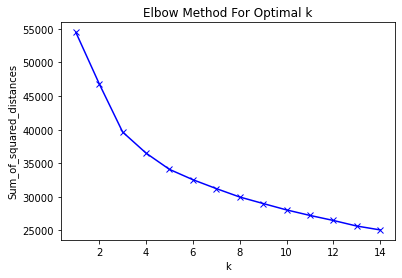

In [8]:
model = search_engine.ranking_system.w2v
total_tokens, tweets_words = KMeans_setup(model)

{'trump': 8573, 'biden': 3353, 'elect': 3230, 'vote': 2377, 'state': 2325}
{'trump': 1151, 'biden': 467, 'elect': 433, 'vote': 327, 'state': 310}
{'trump': 21474, 'biden': 8300, 'elect': 7944, 'state': 5754, 'vote': 5735}


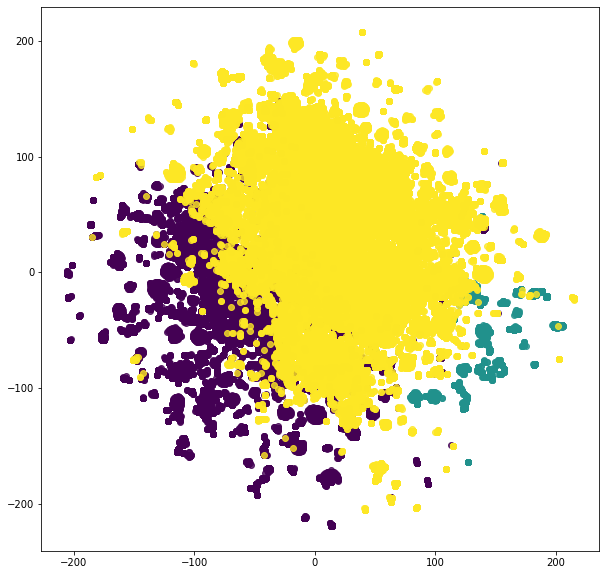

In [9]:
tsne_plot(total_tokens, tweets_words)

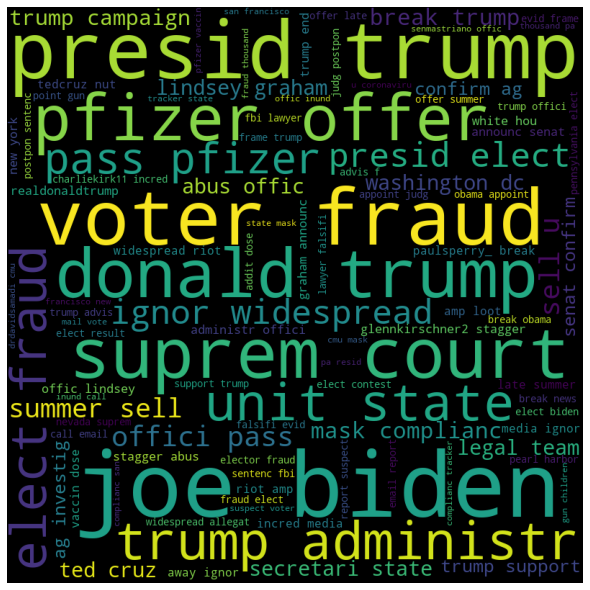

In [10]:
from wordcloud import WordCloud

tweets = search_engine.tweets
words = ""
for tweet in range(len(tweets)):
        words +=tweets["text"][tweet] + " "
    
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                min_font_size = 10).generate(words)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [11]:
tf = {}

for tweet in range(len(tweets)):
    for word in tweets["text"][tweet].split():
        if word not in tf.keys():
            tf[word] = 1
        else:
            tf[word]+=1
tf = dict(sorted(tf.items(), key=lambda item: item[1], reverse=True))


<BarContainer object of 5 artists>

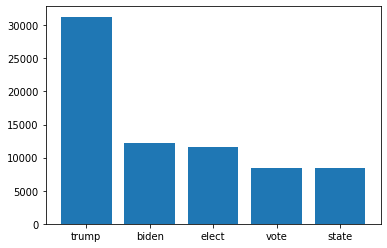

In [12]:
import matplotlib.pyplot as plt

plt.bar(list(tf.keys())[:5], height=list(tf.values())[:5])

In [13]:
print(len(search_engine.original_tweets))

13756
